<IPython.core.display.Javascript object>


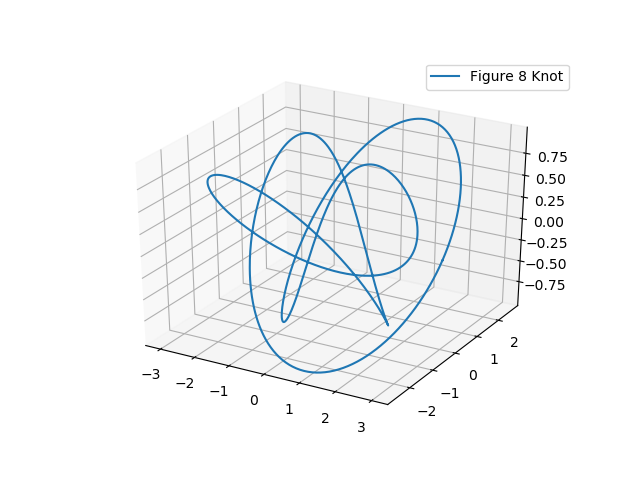

In [2]:
#Copyright 2020 Max Lipton
# Email: ml2437@cornell.edu
# Twitter: @Maxematician
# Website: https://e.math.cornell.edu/people/ml2437/

#Setup and basic definitions

import matplotlib as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from time import time
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mayavi import mlab


%matplotlib notebook

fig = plt.figure();
ax = fig.gca(projection='3d');

#Order of accuracy for Gaussian quadrature
quadorder = 1000;


#Discretization of the domain interval for knot parametrizations
t = np.linspace(0,2*np.pi,1000)

#Knot parametrizations:
#The "numerators" compute ds^2 for each of the parametrizations
#The unknot is coded directly into the potential evaluation

#Trefoil
def trefnum(t):
    return 8 * np.cos(3*t) + 4.5 * np.cos(6*t) + 21.5
def trefx(t):
    return np.sin(t) + 2 * np.sin(2*t)
def trefy(t):
    return np.cos(t) - 2 * np.cos(2*t)
def trefz(t):
    return -1 * np.sin(3*t)


#Figure 8
def fig8num(t):
    return 40 + 36 * np.cos(2*t) + 5 * (np.cos(2*t) ** 2) + 16 * (np.cos(4 * t) ** 2)
def fig8x(t):
    return (2 + np.cos(2*t)) * np.cos(3*t)
def fig8y(t):
    return (2 + np.cos(2*t)) * np.sin(3*t)
def fig8z(t):
    return np.sin(4*t)

#(3,1) Torus Knot
def torus31num(t):
    return 9 * np.cos(t) ** 2 + 36 * np.cos(t) + 37
def torus31x(t):
    return (np.cos(t) + 2) * np.cos(3 * t)
def torus31y(t):
    return (np.cos(t) + 2) * np.sin(3 * t)
def torus31z(t):
    return -1 * np.sin(t)



#Cinquefoil knot AKA (5,2) torus knot
def cinquenum(t):
    return 0.25 * (24 * np.cos(5*t) + 2 * np.cos(10 * t) + 63)
def cinquex(t):
    return  0.5 * (3 + np.cos(5*t)) * np.cos(2*t)
def cinquey(t):
    return 0.5 * (3 + np.cos(5*t)) * np.sin(2*t)
def cinquez(t):
    return 0.5 * np.sin(5*t)

#Parametrization for the 3-twist knot AKA 5_2
def threetwistnum(t):
    return (49 * (np.sin(7 * t) ** 2) + 4 * (np.sin(2 * t + 0.2) ** 2) + 9 * (np.sin(3 * t + 0.7) ** 2))
def threetwistx(t):
    return  2 * np.cos(2*t + 0.2)
def threetwisty(t):
    return 2 * np.cos(3*t + 0.7)
def threetwistz(t):
    return np.cos(7*t)

#Parametrization for the granny knot (the connected sum of two identical trefoils)
def grannynum(t):
    return 1.59375 * np.cos(2*t) + 8.4375 * np.cos(4 * t) + 2 * np.cos(8 * t) - 4.5 * np.cos(10 * t) + 2.53125 * np.cos(12 * t) + 20.25
def grannyx(t):
    return 0.5 * np.cos(t) - 1.25 * np.cos(3 * t)
def grannyy(t):
    return 1.75 * np.sin(t) + 1.25 * np.sin(3 * t)
def grannyz(t):
    return 0.5 * np.sin(4 * t) - 0.375 * np.sin(6 * t)

#Parametrization for the square knot (the connected sum of two oppositely oriented trefoils)
def squarenum(t):
    return 6.09375 * np.cos(2 * t) + 8.4375 * np.cos(4 * t) + 12.5 * np.cos(10 * t) + 28.2188
def squarex(t):
    return 0.5 * np.cos(t) - 1.25 * np.cos(3 * t)
def squarey(t):
    return 1.75 * np.sin(t) + 1.25 * np.sin(3 * t)
def squarez(t):
    return np.sin(5 * t)


#Uses numpy integration to compute the potential at point (a,b,c) with respect to the given knot type
#Order of the Gaussian quadratures is fixed at 1000
#Use "unknot," "trefoil," "fig8," etc. to specify the knot type
def potential(a,b,c,knottype):
    if knottype == "unknot":
        ans, err = integrate.fixed_quad(lambda t: 1/(((a - 1 * np.cos(t)) ** 2 + (b - 1 * np.sin(t)) ** 2 + c ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans
    elif knottype == "trefoil":
        ans, err = integrate.fixed_quad(lambda t: np.sqrt(trefnum(t))/(((a - trefx(t)) ** 2 + (b - trefy(t)) ** 2 + (c - trefz(t)) ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans
    elif knottype == "fig8":
        ans, err = integrate.fixed_quad(lambda t: np.sqrt(fig8num(t))/(((a - fig8x(t)) ** 2 + (b - fig8y(t)) ** 2 + (c - fig8z(t)) ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans
    elif knottype == "torus31":
        ans, err = integrate.fixed_quad(lambda t: np.sqrt(torus31num(t))/(((a - torus31x(t)) ** 2 + (b - torus31y(t)) ** 2 + (c - torus31z(t)) ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans
    elif knottype == "cinque":
        ans, err = integrate.fixed_quad(lambda t: np.sqrt(cinquenum(t))/(((a - cinquex(t)) ** 2 + (b - cinquey(t)) ** 2 + (c - cinquez(t)) ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans
    elif knottype == "3twist":
        ans, err = integrate.fixed_quad(lambda t: np.sqrt(threetwistnum(t))/(((a - threetwistx(t)) ** 2 + (b - threetwisty(t)) ** 2 + (c - threetwistz(t)) ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans
    elif knottype == "granny":
        ans, err = integrate.fixed_quad(lambda t: np.sqrt(grannynum(t))/(((a - grannyx(t)) ** 2 + (b - grannyy(t)) ** 2 + (c - grannyz(t)) ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans
    elif knottype == "square":
        ans, err = integrate.fixed_quad(lambda t: np.sqrt(squarenum(t))/(((a - squarex(t)) ** 2 + (b - squarey(t)) ** 2 + (c - squarez(t)) ** 2) ** (1/2)),0, 2*np.pi, n = quadorder)
        return ans    
    else:
        print("Invalid knot type");
        return NaN
    


#Data for the knot plots
    
punknotx = 1 * np.cos(t)
punknoty = 1 * np.sin(t)
punknotz = 0 * t

ptrefx = trefx(t)
ptrefy = trefy(t)
ptrefz = trefz(t)

pfig8x = fig8x(t)
pfig8y = fig8y(t)
pfig8z = fig8z(t)


pcinquex = cinquex(t)
pcinquey = cinquey(t)
pcinquez = cinquez(t)

p3twistx = threetwistx(t)
p3twisty = threetwisty(t)
p3twistz = threetwistz(t)

pgrannyx = grannyx(t)
pgrannyy = grannyy(t)
pgrannyz = grannyz(t)

psquarex = squarex(t)
psquarey = squarey(t)
psquarez = squarez(t)



#Plots the knots on the same graph. Uncomment the knots you want to see.

ax.plot(pfig8x, pfig8y, pfig8z, label = 'Figure 8 Knot')
#ax.plot(ptrefx, ptrefy, ptrefz, label = 'Trefoil Knot')
#ax.plot(punknotx, punknoty, punknotz, label = 'Unknot')
#ax.plot(pcinquex, pcinquey, pcinquez, label = 'Cinquefoil Knot')
#ax.plot(p3twistx, p3twisty, p3twistz, label = '3-Twist Knot')
#ax.plot(pgrannyx, pgrannyy, pgrannyz, label = 'Granny Knot')
#ax.plot(psquarex, psquarey, psquarez, label = 'Square Knot')
plt.legend()
plt.show()


In [6]:
#Plot a level potential surface with the quadrature method of evaluation

#Makes the domain with mesh fineness of order n
def makedomain(n):
    return 4 * np.mgrid[-1:1:n*1j, -1:1:n*1j, -1:1:n*1j]



def generateverts(knottype, n):
    
    
    #Set this variable to the value corresponding to the level surface, you wish to compute
    #Most knots have the origin as a critical point, so slightly perturbing will yield a smooth surface   
    c = potential(0,0,0,knottype) + 0.1
    
    
    domx, domy, domz = makedomain(n)
    potential2 = np.vectorize(potential)
    t0 = time()
    vol = potential2(domx, domy, domz, knottype) 
    verts, faces = measure.marching_cubes_classic(vol, c, spacing=(1,1,1))

    t1 = time()
    print("Level surface of Phi(x) = ", c)
    print("Time taken: ", (t1 - t0), "seconds")
    return verts, faces
    
def showsurface(verts, faces):
    #Replace the colormap to change the color of the surface
    #See https://docs.enthought.com/mayavi/mayavi/mlab_changing_object_looks.html for a list of choices
    mlab.triangular_mesh(verts[:,0], verts[:,1], verts[:,2], faces, colormap='spring' )
    mlab.show()
    return None


def makesurface(knottype, n):
    verts, faces = generateverts(knottype, n)
    showsurface(verts, faces)
    #showsurface2(verts, faces)
    return verts, faces
    

#Display using matplotlib, which is slower than Mayavi
#Comment out showsurface and uncomment showsurface2 in the makesurface function to use matplotlib

def showsurface2(verts, faces):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:,2], cmap='Spectral', lw=1)
    plt.show()


In [7]:
#Run this command to generate a surface, specifying the knot type and the fine-ness of the mesh
#Note that the evaluation time increases cubically with the fineness parameter.
#Returns the vertex and face arrays for the surface, which you can store in a text file with the np.savetxt function

makesurface("unknot", 100)

Level surface of Phi(x) =  6.383185307179586
Time taken:  48.26819658279419 seconds


(array([[35.        , 45.        , 48.03627186],
        [34.703247  , 45.        , 49.        ],
        [35.        , 44.20392221, 49.        ],
        ...,
        [64.28252588, 53.        , 51.        ],
        [64.296753  , 54.        , 49.        ],
        [64.296753  , 54.        , 50.        ]]), array([[   0,    1,    2],
        [   3,    2,    1],
        [   1,    4,    3],
        ...,
        [2579, 2630, 2580],
        [2580, 2630, 2631],
        [2572, 2580, 2631]]))